<h1 align="center"><font size="6">Bank Marketing ML Model </font></h1>

<html lang="en">
<head>
    <style>
        .index-container {
            background-color: #121212; /* Dark background */
            color: #FFFFFF; /* White text color */
            padding: 20px;
            font-family: Arial, sans-serif;
        }
        .index-container a {
            color: #1E90FF; /* Blue links */
            text-decoration: none;
        }
        .index-container a:visited {
            color: #800080; /* Purple color for visited links */
        }
        .index-container a:hover {
            text-decoration: underline;
        }
        .index-container ul {
            list-style: none;
            margin: 0;
            padding: 0;
        }
        .index-container li {
            display: block;
        }
    </style>
</head>
<body>
<div class="index-container">
<h2>Table of Contents</h2>
        <ul style="list-style-type:none; margin:0;">
        <li><a href="#Welcome">1. Welcome</a></li>
        <li><a href="#About-This-Project">2. About This Project</a></li>
        <li><a href="#Importing-Data-Sets">3. Importing Data </a></li>
        <li><a href="#Build-the-Logistic-Regression-Model "> 4. Build the Logistic Regression Model</a> </li>
        <li><a href="#Confusion-Matrix-of-Logistic-Regression-Model"> 5. Confusion Matrix of Logistic Regression Model</a> </li>
        <li><a href="#Plot-an-ROC-curve-and-calculate-AUC"> 6. Plot an ROC curve and calculate AUC</a> </li>
        <li><a href="#Decision-Tree"> 7. Decision Tree</a> </li>
        <li><a href="#Explain-Decision-Tree-Confusion-Matrix"> 8. Explain Decision Tree Confusion Matrix</a> </li>
        <li><a href="#Conclusion:-Decision-Tree"> 9. Conclusion: Decision Tree</a> </li>
        <li><a href="#Rebulid-the-tree-with-Control-Parameters"> 10. Rebulid the tree with Control Parameters</a> </li>
        <li><a href="#Confusion-Matrix-for-Tree-with-Control-Parameters"> 11. Confusion Matrix for Tree with Control Parameters</a> </li>
        <li><a href="# Find-best-cp-with-Cross-Validation---Decision-Tree-with-Control-Parameters"> 12. Find best cp with Cross Validation - Decision Tree with Control Parameters </a> </li>
        <li><a href="#Prune-the-tree-using-the-best-cp-value"> 13. Prune the tree using the best cp value</a> </li>
        <li><a href="#Confusion-Matrix-and-Statistics-of-Tree-using-the-best-cp-value"> 14. Confusion Matrix and Statistics of Tree using the best cp value</a> </li>
        <li><a href="#Conclusion:-Tree-using-the-best-cp"> 15. Conclusion: Tree using the best cp </a> </li>
        <li><a href="#Variable-Importance-in-Decision-Tree"> 16. Variable Importance in Decision Tree</a> </li>
        <li><a href="#Random-Forest"> 17. Random Forest </a> </li>
        <li><a href="#Confusion-Matrix-and-Statistics-of-Random-Forest"> 18. Confusion Matrix and Statistics of Random Forest </a> </li>
        <li><a href="#Random-Forest-Performance-Summary"> 19. Random Forest Performance Summary</a> </li>
        <li><a href="#Random-Forest-Plot-an-ROC-curve-and-calculate-AUC"> 20. Random Forest Plot an ROC curve and calculate AUC</a> </li>
        <li><a href="#Plot-both-ROC-Curves:-Random-Forest-vs-Logistic-Regression"> 21. Plot both ROC Curves: Random Forest vs Logistic Regression </a> </li>
    </ul>
</div>
<hr>
</body>
</html>

# Welcome
<p>"Hello Kaggle community! Thrilled to share my very first kernel with you all. Consider this my maiden voyage into the world of Kaggle notebooks. If you find even a spark of insight or enjoyment within, an upvote would be a fantastic welcome aboard! I'm particularly eager to hear your thoughts – even a single word in the comments would be incredibly valuable. And if you happen to appreciate the code, a like would truly fuel my future explorations here. This kernel is a living document, and I'll be refining and expanding it as I learn. So, let's dive in!"</p>

# About This Project
<p>This project utilizes the classic marketing bank dataset, originally hosted on the UCI Machine Learning Repository. The dataset contains valuable information regarding a past marketing campaign conducted by a financial institution. My analysis aims to uncover key insights within this data to inform and improve future marketing strategies for the bank.</p>

In [1]:
library(ggplot2)
library(caret)
library(dplyr)
library(pROC)
library(rpart)
library(rpart.plot)
library(caret)
library(randomForest)

Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:httr’:

    progress





Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Type 'citation("pROC")' for a citation.




Attaching package: ‘pROC’




The following objects are masked from ‘package:stats’:

    cov, smooth, var




randomForest 4.7-1.1



Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘randomForest’




The following object is masked from ‘package:dplyr’:

    combine




The following object is masked from ‘package:ggplot2’:

    margin




# Importing Data Sets

In [2]:
data = read.csv("../input/bank-marketing-dataset/bank.csv")

<p> Target varible is "deposit"</p>
<p> y - has the client subscribed a term deposit? (binary: 'yes','no')</p>


In [3]:
colnames(data)

[1] "age"       "job"       "marital"   "education" "default"   "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "deposit"

In [4]:
# Check stucture
str(data)

'data.frame':	11162 obs. of  17 variables:
 $ age      : int  59 56 41 55 54 42 56 60 37 28 ...
 $ job      : chr  "admin." "admin." "technician" "services" ...
 $ marital  : chr  "married" "married" "married" "married" ...
 $ education: chr  "secondary" "secondary" "secondary" "secondary" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2343 45 1270 2476 184 0 830 545 1 5090 ...
 $ housing  : chr  "yes" "no" "yes" "yes" ...
 $ loan     : chr  "no" "no" "no" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 6 6 6 6 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  1042 1467 1389 579 673 562 1201 1030 608 1297 ...
 $ campaign : int  1 1 1 1 2 2 1 1 1 3 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ deposit  : chr  "yes" "yes" "yes" "yes" ...


In [5]:
# Convert all chr columns to  factor
data[sapply(data, is.character)]= lapply (data[sapply(data, is.character)], as.factor)

In [6]:
# Check stucture
str(data)

'data.frame':	11162 obs. of  17 variables:
 $ age      : int  59 56 41 55 54 42 56 60 37 28 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 1 1 10 8 1 5 5 6 10 8 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 3 2 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 2 2 2 2 3 3 3 2 2 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  2343 45 1270 2476 184 0 830 545 1 5090 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 1 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 6 6 6 6 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  1042 1467 1389 579 673 562 1201 1030 608 1297 ...
 $ campaign : int  1 1 1 1 2 2 1 1 1 3 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous

In [7]:
# Check Null value counts of each column
colSums(is.na(data))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
  deposit 
        0

In [8]:
# Set seed for reproducibility
set.seed(123)

In [9]:
# Create traning and testing indices
sample_index = sample(1:nrow(data), 0.8 * nrow(data))

In [10]:
# Split the data
train_data = data[sample_index,  ]
test_data = data[-sample_index,  ]

# Build the Logistic Regression Model

In [11]:
#  Build logistic regression model
model = glm(deposit ~ ., data = train_data, family = "binomial")

In [12]:
# View summary of the model
summary(model)


Call:
glm(formula = deposit ~ ., family = "binomial", data = train_data)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -7.230e-01  3.017e-01  -2.396 0.016563 *  
age                 1.342e-03  3.586e-03   0.374 0.708294    
jobblue-collar     -3.312e-01  1.167e-01  -2.838 0.004539 ** 
jobentrepreneur    -3.421e-01  1.973e-01  -1.734 0.082927 .  
jobhousemaid       -4.704e-01  2.101e-01  -2.239 0.025161 *  
jobmanagement      -2.528e-01  1.195e-01  -2.114 0.034483 *  
jobretired          2.186e-01  1.638e-01   1.335 0.181980    
jobself-employed   -3.396e-01  1.799e-01  -1.888 0.059078 .  
jobservices        -3.329e-01  1.353e-01  -2.461 0.013851 *  
jobstudent          6.769e-01  1.999e-01   3.385 0.000711 ***
jobtechnician      -1.591e-01  1.106e-01  -1.438 0.150343    
jobunemployed      -2.269e-02  1.853e-01  -0.122 0.902550    
jobunknown         -2.864e-01  3.771e-01  -0.760 0.447461    
maritalmarried     -1.655e-01  9.430e-02  -

In [13]:
# Predict on test data
predicted_prob = predict(model, newdata = test_data, type = "response")

In [14]:
# Convert probabilities to class lables (yes/ No)
# Convert probabilities to class labels (yes/ No)
predicted_class = ifelse(predicted_prob > 0.5, "yes", "no")

In [15]:
# Convert to fractor to match actual
predicted_class = as.factor(predicted_class)

# Confusion Matrix of Logistic Regression Model

In [16]:
confusionMatrix(predicted_class, test_data$deposit)

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1007  189
       yes  187  850
                                          
               Accuracy : 0.8316          
                 95% CI : (0.8154, 0.8469)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6616          
                                          
 Mcnemar's Test P-Value : 0.9589          
                                          
            Sensitivity : 0.8434          
            Specificity : 0.8181          
         Pos Pred Value : 0.8420          
         Neg Pred Value : 0.8197          
             Prevalence : 0.5347          
         Detection Rate : 0.4510          
   Detection Prevalence : 0.5356          
      Balanced Accuracy : 0.8307          
                                          
       'Positive' Class : no              
                        

# Plot an ROC curve and calculate AUC

In [17]:
# Predict probabilities for the test set
probabilities_log = predict(model, newdata = test_data, type = "response")


In [18]:
# Create ROC object
roc_log = roc(test_data$deposit, probabilities_log)

Setting levels: control = no, case = yes



Setting direction: controls < cases



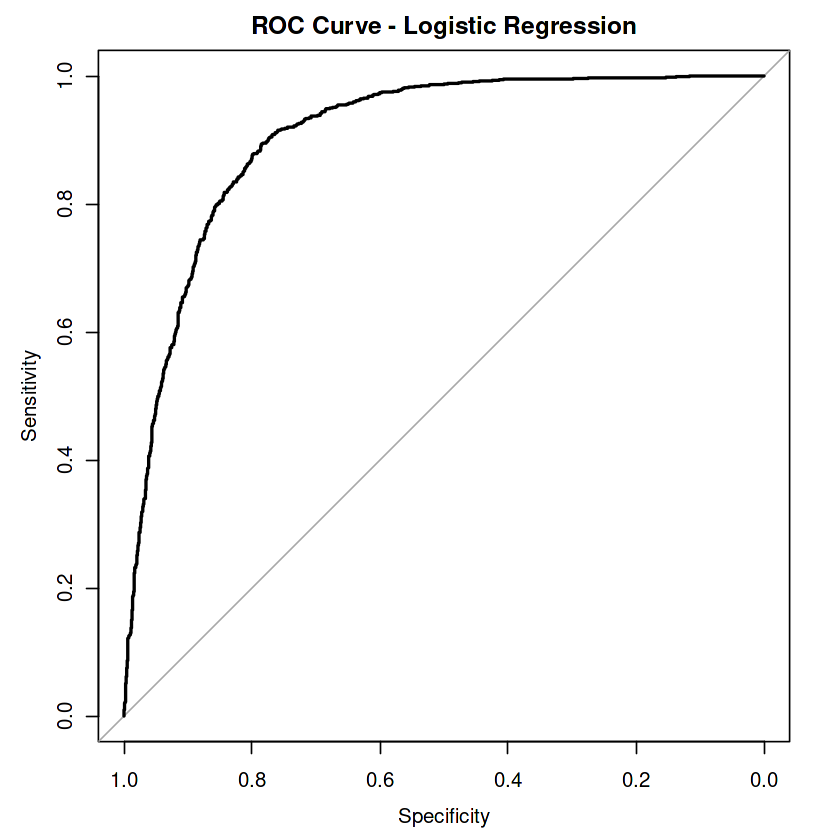

In [19]:
# Plot ROC curve
plot(roc_log, main = "ROC Curve - Logistic Regression")

In [20]:
# Calculate AUC
auc_log = auc(roc_log)
print(auc_log)

Area under the curve: 0.9053


# Decision Tree

In [21]:
# Build the tree model
tree_model = rpart(deposit ~ ., data = train_data, method = "class")

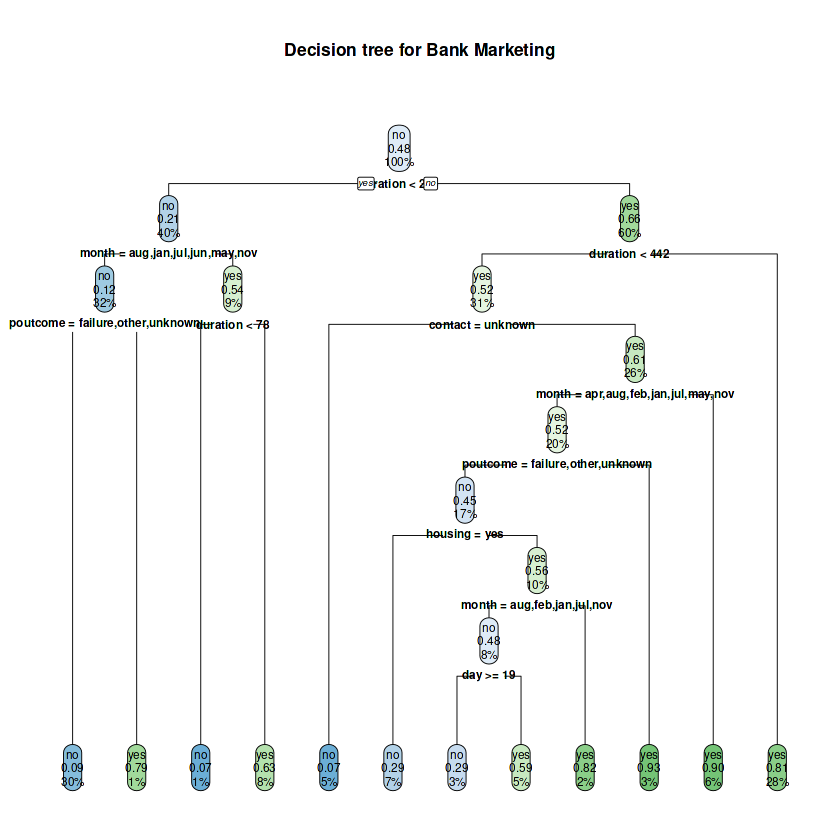

In [22]:
# Visualize the Decision Tree
rpart.plot(tree_model, main = "Decision tree for Bank Marketing")

In [23]:
# Make Predictions on Test Data (predicted_class has a row for each test_data)
predicted_class = predict(tree_model, newdata = test_data, type = "class")

In [24]:
# Evaluate the model
confusionMatrix(predicted_class, test_data$deposit)

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  911 118
       yes 283 921
                                          
               Accuracy : 0.8204          
                 95% CI : (0.8039, 0.8361)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6428          
                                          
 Mcnemar's Test P-Value : 2.617e-16       
                                          
            Sensitivity : 0.7630          
            Specificity : 0.8864          
         Pos Pred Value : 0.8853          
         Neg Pred Value : 0.7650          
             Prevalence : 0.5347          
         Detection Rate : 0.4080          
   Detection Prevalence : 0.4608          
      Balanced Accuracy : 0.8247          
                                          
       'Positive' Class : no              
                              

# Explain  Decision Tree Confusion Matrix

1.	Accuracy => 82.04%
2.	Sensitivity (Recall for class “Mo”) - 
                This tells how well the model identifies actual “Mo”.
                Out of actual “no”, 76.3% were correctly predicted.
3.	Specificity => 88.64% -
                The model correctly identifies actual “yes”, 88.6%
5.	Positive Predictive Value(Precision for “no”) = 88.5%
                Predicted “no” cases, 88.5% were truly “no”.
6.	Negative Predictive Value => 76.50% -
                The predicted “Yes” cases, 76.5% were truly “yes”.
7.	Kappa => 0.6428 -
                A measure of agreement between predicted and actual values (adjusted for chance).
                Values between 0.6 – 0.8 show substantial agreement.


# Conclusion: Decision Tree 
The decision tree is performing well with high specificity and solid overall accuracy. This model especially good at detecting actual deposit customers (high specificity and precision), although sensitivity is a bit lower than the logistic regression model – which is normal for a tree.


# Rebulid the tree with Control Parameters

In [25]:
# Fine-tuned decision tree
tree_model_tuned = rpart(deposit ~ ., data = train_data, 
                         method = "class",
                         control = rpart.control(minsplit = 20, 0.01, maxdepth = 5))

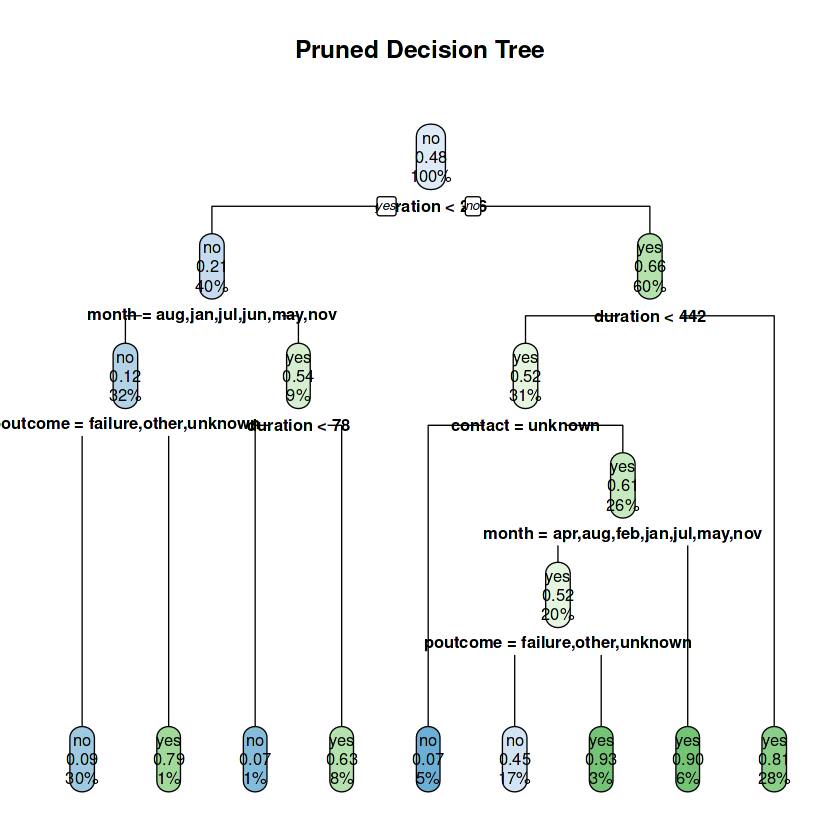

In [26]:
# Visualize the tuned tree
rpart.plot(tree_model_tuned, main ="Pruned Decision Tree")

In [27]:
# Evaluate the tuned model
# Predictions
Predicted_class_tuned = predict(tree_model_tuned, test_data, type = "class")

# Confusion Matrix for Tree with Control Parameters

In [28]:
# Confusion matrix
confusionMatrix(Predicted_class_tuned, test_data$deposit)

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  984 199
       yes 210 840
                                          
               Accuracy : 0.8168          
                 95% CI : (0.8002, 0.8327)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6322          
                                          
 Mcnemar's Test P-Value : 0.621           
                                          
            Sensitivity : 0.8241          
            Specificity : 0.8085          
         Pos Pred Value : 0.8318          
         Neg Pred Value : 0.8000          
             Prevalence : 0.5347          
         Detection Rate : 0.4407          
   Detection Prevalence : 0.5298          
      Balanced Accuracy : 0.8163          
                                          
       'Positive' Class : no              
                              

# Find best cp with Cross Validation - Decision Tree with Control Parameters

In [29]:
# Find best cp with Cross Validation
printcp(tree_model_tuned)


Classification tree:
rpart(formula = deposit ~ ., data = train_data, method = "class", 
    control = rpart.control(minsplit = 20, 0.01, maxdepth = 5))

Variables actually used in tree construction:
[1] contact  duration month    poutcome

Root node error: 4250/8929 = 0.47598

n= 8929 

        CP nsplit rel error  xerror      xstd
1 0.391294      0   1.00000 1.00000 0.0111040
2 0.048353      1   0.60871 0.60965 0.0100907
3 0.020706      3   0.51200 0.51365 0.0095556
4 0.018118      5   0.47059 0.47082 0.0092712
5 0.016706      7   0.43435 0.46541 0.0092331
6 0.010000      8   0.41765 0.42259 0.0089125


The row with the lowest cross-validation error(xerror) is usually considered the best model. In my case it’s the last raw, cp = 0.01.


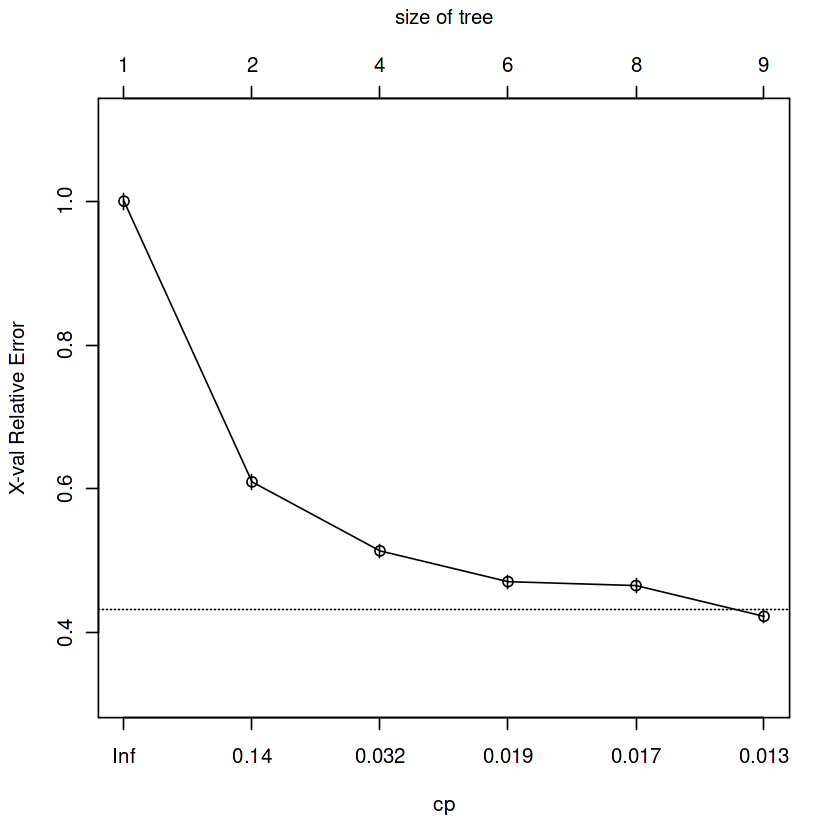

In [30]:
plotcp(tree_model_tuned)

# Prune the tree using the best cp value

In [31]:
# Prune the tree using the best cp value
tree_pruned = prune(tree_model_tuned, cp = 0.01)

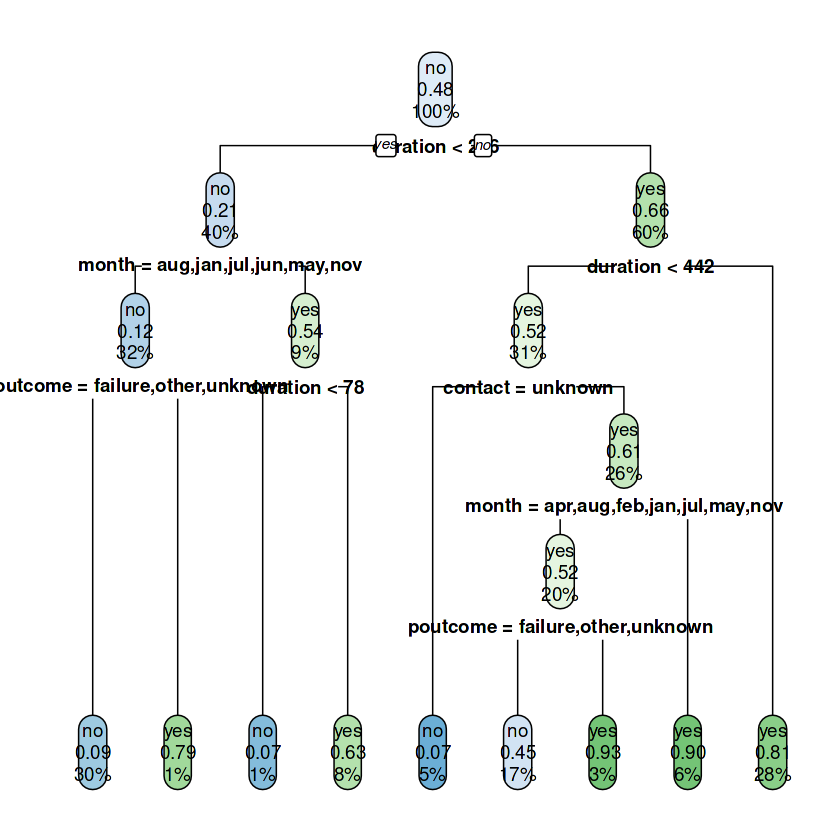

In [32]:
# The pruned tree
rpart.plot(tree_pruned)

In [33]:
# Predict on test data
predicted_class_pruned = predict(tree_pruned, test_data, type = "class")

# Confusion Matrix and Statistics of Tree using the best cp value

In [34]:
# Evaluate
confusionMatrix(predicted_class_pruned, test_data$deposit)

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  984 199
       yes 210 840
                                          
               Accuracy : 0.8168          
                 95% CI : (0.8002, 0.8327)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6322          
                                          
 Mcnemar's Test P-Value : 0.621           
                                          
            Sensitivity : 0.8241          
            Specificity : 0.8085          
         Pos Pred Value : 0.8318          
         Neg Pred Value : 0.8000          
             Prevalence : 0.5347          
         Detection Rate : 0.4407          
   Detection Prevalence : 0.5298          
      Balanced Accuracy : 0.8163          
                                          
       'Positive' Class : no              
                              

# Conclusion: Tree using the best cp
<p>
<li>The pruned tree is performing just as well as well as earlier tuned tree, with no drop in accuracy, but it ‘s now simpler and more interpretable (suitable for real-world decision making).</li>
<li>No overfitting signs.</li>
</p>

In [35]:
# View variable importance (numerically) 
tree_model_tuned$variable.importance

duration       month     contact    poutcome    campaign     housing 
1145.567728  363.116919  232.607505  220.319988   34.333438   12.929587 
        age       pdays    previous         day     balance 
  12.555771   12.351527   11.649679    9.246973    0.396798

<p>
<li>Most significant factor for predicting deposit is “duration”.</li>
<li>Duration, month, contact, poutcome are most 4 significant factors for predicting deposit.</li>
</p>


# Variable Importance in Decision Tree

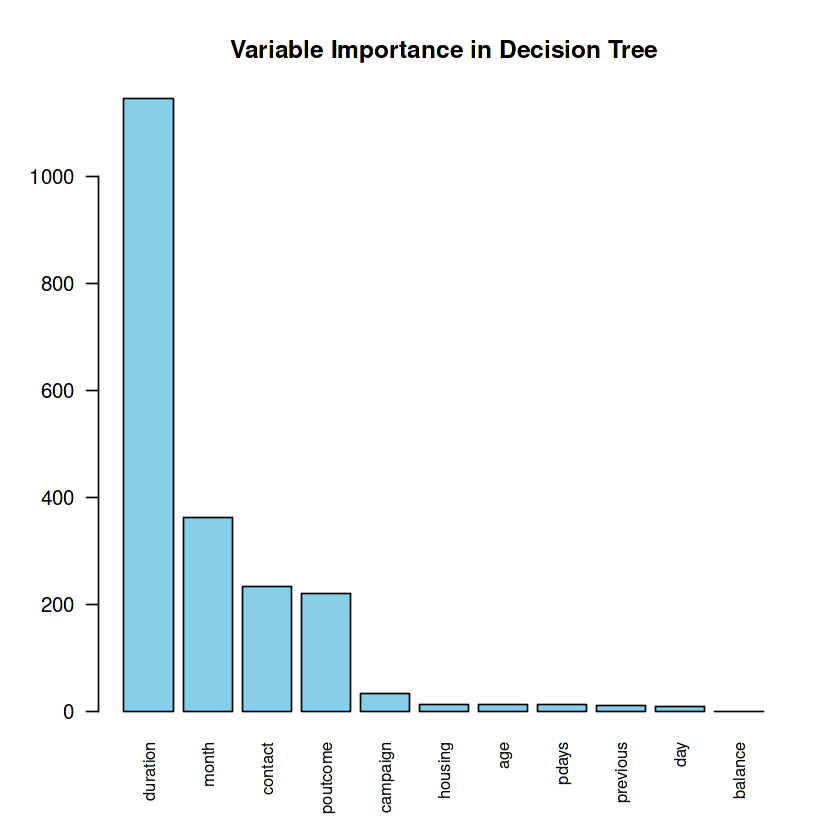

In [36]:
# Create a bar plot of variable omportance
importance = tree_model_tuned$variable.importance
barplot(importance,
        main = "Variable Importance in Decision Tree",
        col = "Skyblue",
        las = 2,
        cex.names = 0.8)

# Random Forest

In [37]:
# Bulid the model
rf_model = randomForest(deposit ~ ., data = train_data, ntree = 100, mtry = 4,
                        importance = TRUE)

In [38]:
# mtry = 4; number of variables randomly selected at each split
# importance = TRUE; Let check variable importance later.

# Make predictions
predicted_rf = predict(rf_model, test_data)

# Confusion Matrix and Statistics of Random Forest

In [39]:
# Evaluate the model
confusionMatrix(predicted_rf, test_data$deposit)

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  971  96
       yes 223 943
                                          
               Accuracy : 0.8571          
                 95% CI : (0.8419, 0.8714)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7152          
                                          
 Mcnemar's Test P-Value : 1.73e-12        
                                          
            Sensitivity : 0.8132          
            Specificity : 0.9076          
         Pos Pred Value : 0.9100          
         Neg Pred Value : 0.8087          
             Prevalence : 0.5347          
         Detection Rate : 0.4348          
   Detection Prevalence : 0.4778          
      Balanced Accuracy : 0.8604          
                                          
       'Positive' Class : no              
                              

# Random Forest Performance Summary
<li>Accuracy = 86.7%</li>
<li>Sensitivity (Recall for class ‘no’): 81.3%</li>
<li>Specificity (Recall for class ‘yes’): 90.8%</li>
<li>Positive Predictive Value (when the model predict no it is correct): 91%</li>	
<li>Balanced Accuracy(Average of sensitivity and specificity): 86%</li>
<li>Kappa: 0.7152</li>

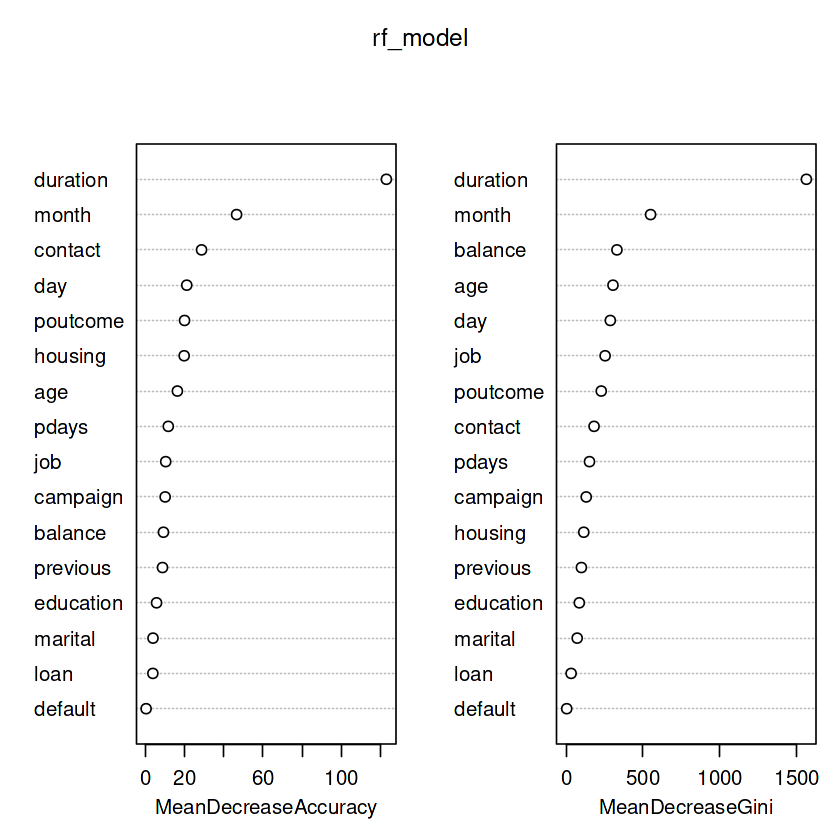

In [40]:
# Visualize variable importance
varImpPlot(rf_model)

# Random Forest Plot an ROC curve and calculate AUC

In [41]:
# Get probabilities for the positive class ("no" is our positive class)
prob_rf = predict(rf_model, test_data, type = "prob")[   , "no"]

Setting direction: controls < cases



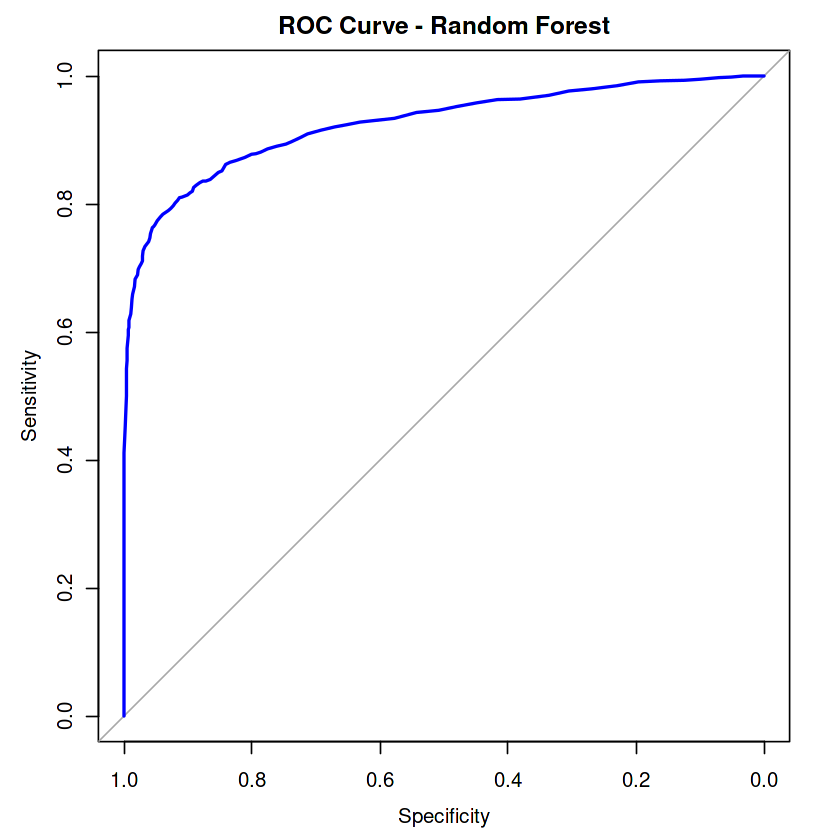

In [42]:
# plot the ROC curve
roc_rf = roc(test_data$deposit, prob_rf, levels = c("yes", "no"))
plot(roc_rf, col="blue", main = "ROC Curve - Random Forest")

In [43]:
auc_rf = auc(roc_rf)

In [44]:
# Print AUC
print(paste("AUC:", round(auc_rf, 4)))

[1] "AUC: 0.9247"


# Plot both ROC Curves: Random Forest vs Logistic Regression

In [45]:
# Ensure plotting starts fresh
dev.new()  # Opens a new graphics window (important on some systems)

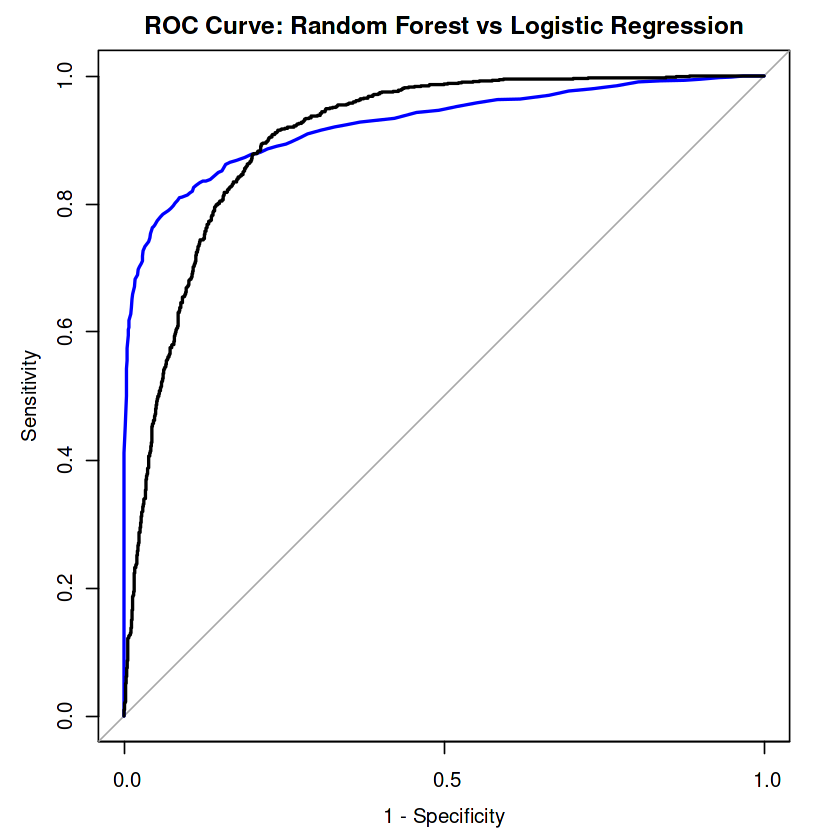

In [46]:
# Plot ROC for Random Forest first
plot(roc_rf,
     col = "blue",
     legacy.axes = TRUE,
     main = "ROC Curve: Random Forest vs Logistic Regression",
     lwd = 2)

# Add ROC for Logistic Regression
plot(roc_log,
     col = "black",
     add = TRUE,
     lwd = 2)

# Add legend
legend("bottomright",
       legend = c("Random Forest", "Logistic Regression"),
       col = c("blue", "black"),
       lwd = 2)